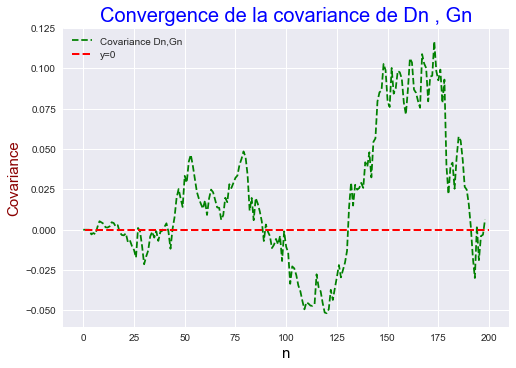

In [33]:
from numpy import *
from random import *
from scipy.stats import binom
import numpy.random as npr
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import scipy.stats
import numpy as np
from scipy.spatial import ConvexHull, convex_hull_plot_2d

def simulate_loi_d(N):
    tab =[]
    D=np.zeros(N+1)
    D[0]=0
    D[1]=0
    for i in range(2,(N+1)):
       p =((i-1)-D[i-1])/(i)
       B=np.random. binomial (1,p,1)
       D[i]=D[i-1]+B
    
    return D

def simulate_loi_g(N):
    G=np.zeros(N+1)
    G[0]=0
    G[1]=0
    G[2]=1
    

    for i in range(3,N+1):
        g2=((i-2)-G[i-1])/i
        g1=2/i
        g0=G[i-1]/i
        
        
        nbaleatoire=random()
        if(nbaleatoire<=g0):
            G[i]=G[i-1]
        ##gauche
        elif(nbaleatoire<=(g0+g1)):
            G[i]=G[i-1]+1
        ##haut
        elif(nbaleatoire<=(g0+g1+g2)):
            G[i]=G[i-1]+2
        
    return G

tab_loi=[]
tab_carre=[]
tab2_loi=[]
tab_cord=[]
t=[]


tab_cov=[]
def simulate2(N,repetition):
    for i in range (1,repetition):
        
        d=simulate_loi_d(N)
        tab_loi.append(d)

        g=simulate_loi_g(N)
        tab2_loi.append(g)

    
    for i in range (1,N):
        esp_dn_c=[]
        esp_gn_c=[]
        tab_cord_c=[]
        for k in range (1,repetition):
            esp_dn_c.append(tab_loi[k-1][i-1])
            esp_gn_c.append(tab2_loi[k-1][i-1])
            tab_cord_c.append(tab_loi[k-1][i-1]*tab2_loi[k-1][i-1])
            
        esp_dn_c=mean(esp_dn_c)
        esp_gn_c=mean(esp_gn_c)
        tab_cord_c=mean(tab_cord_c)
        tab_cov.append(tab_cord_c-(esp_dn_c*esp_gn_c))
        
   
    T=linspace(1,N,N)
    
    plt1.style.use('seaborn')
    plt1.title("Convergence de la covariance de Dn , Gn",fontsize=20,color="blue")
    plt1.xlabel('n',fontsize=15,color="black")
    plt1.ylabel('Covariance',fontsize=15,color="darkred")
    plt1.plot (tab_cov,'g--',label="Covariance Dn,Gn")
    plt1.plot (T,0 * linspace (1 ,N ,N),'r--',lw=2,label="y=0")
    plt1.legend()
    plt1.savefig('Convergence_covariance.png')
    plt1.show
    
simulate2(200,100000)